<a href="https://colab.research.google.com/github/rajeshkumar2637/Agency.AI/blob/main/ml_ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [ ]:
#upload data from drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# path from drive
train_path='/content/drive/MyDrive/Housing_prices/train.csv'
test_path='/content/drive/MyDrive/Housing_prices/test.csv'

#load dataset

train_df=pd.read_csv(train_path)
test_df=pd.read_csv(test_path)

#display the head of train dataset

print("Train shape : ", train_df.shape)
train_df.head()

Train shape :  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# checking for missing values

In [ ]:
# check the missing values

missing=train_df.isnull().sum()
missing_value=missing[missing>0]
print(missing_value)


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:

#separate target and others colunms
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']


# separate numric and categorical colunms
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object']).columns


# Create imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')



In [ ]:




X[num_cols] = num_imputer.fit_transform(X[num_cols])
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])


#  K-Fold Split
skf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    print(f" Fold {fold}")
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print("Train set:", X_train.shape, y_train.shape)
    print("Val set:  ", X_test.shape, y_test.shape)


    #  break after the first fold
    break


 Fold 1
Train set: (1168, 80) (1168,)
Val set:   (292, 80) (292,)


# Use the linear regression method to estimate the slope and intercept for predicting “SalePrice” based on “LotArea”.


 Linear Regression Results for SalePrice ~ LotArea
Slope (m): 1.911621677853414
Intercept (b): 161006.99034068309
Equation: SalePrice = 1.91 * LotArea + 161006.99


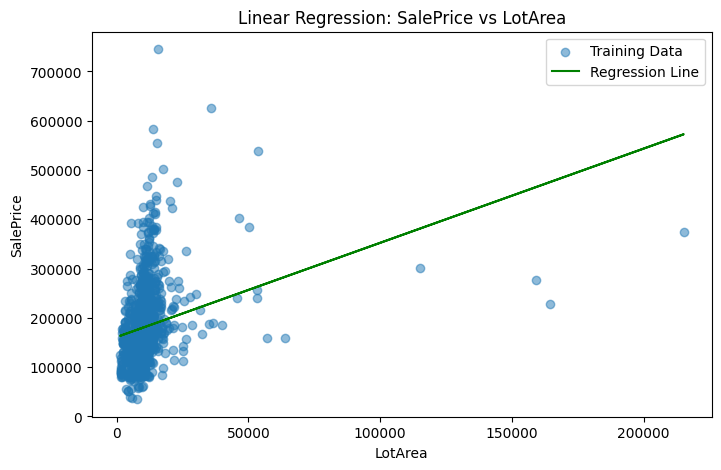

In [ ]:


X_train_lot = X_train[['LotArea']]


# Initialize Linear Regression model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train_lot, y_train)

# Get slope (coefficient) and intercept
slope = lin_reg.coef_[0]
intercept = lin_reg.intercept_

print("\n Linear Regression Results for SalePrice ~ LotArea")
print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")
print(f"Equation: SalePrice = {slope:.2f} * LotArea + {intercept:.2f}")


# Plot regression line
plt.figure(figsize=(8, 5))
plt.scatter(X_train_lot, y_train, alpha=0.5, label='Training Data')
plt.plot(X_train_lot, lin_reg.predict(X_train_lot), color='green', label='Regression Line')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression: SalePrice vs LotArea')
plt.legend()
plt.show()


In [ ]:


# Helper function to train and print model coefficients
def train_and_report(features, model_name):
    X_model = X[features].copy()
    y_model = y


    num_imputer = SimpleImputer(strategy='median')
    X_model_imputed = num_imputer.fit_transform(X_model)


    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_model_imputed, y_model)


    print(f"\n {model_name}")
    print("Intercept:", model.intercept_)
    for feat, coef in zip(features, model.coef_):
        print(f"Coefficient for {feat}: {coef:.2f}")

# Model 1

In [ ]:
features_model_1 = ['LotFrontage', 'LotArea']
train_and_report(features_model_1, "Model 1: LotFrontage, LotArea")


 Model 1: LotFrontage, LotArea
Intercept: 95326.50042472177
Coefficient for LotFrontage: 1011.37
Coefficient for LotArea: 1.42


# Model 2

In [ ]:
features_model_2 = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']
train_and_report(features_model_2, "Model 2: LotFrontage, LotArea, OverallQual, OverallCond")


 Model 2: LotFrontage, LotArea, OverallQual, OverallCond
Intercept: -121481.13404994077
Coefficient for LotFrontage: 408.29
Coefficient for LotArea: 1.20
Coefficient for OverallQual: 42984.53
Coefficient for OverallCond: -155.91


# Model 3

In [ ]:

features_model_3 = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']
train_and_report(features_model_3, "Model 3: LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF, GrLivArea")


 Model 3: LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF, GrLivArea
Intercept: -128671.61899840608
Coefficient for LotFrontage: 57.82
Coefficient for LotArea: 0.65
Coefficient for OverallQual: 31156.56
Coefficient for OverallCond: 1345.86
Coefficient for 1stFlrSF: 34.73
Coefficient for GrLivArea: 40.15


#  Calculate and compare the Mean Squared Error, R2 score for each of the model  using the training set and test set.



Model 1
Intercept: 95326.50042472177
Coefficient for LotFrontage: 1011.37
Coefficient for LotArea: 1.42
 Train MSE: 5417773306.62
 Train R² Score: 0.1410
Test Predictions (first 5): [192742.37153859 197510.38465028 189810.15303634 188384.69392525
 145923.78930459]


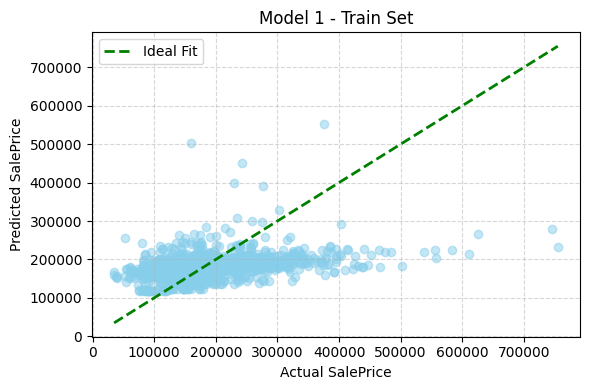


Model 2
Intercept: -121481.13404994077
Coefficient for LotFrontage: 408.29
Coefficient for LotArea: 1.20
Coefficient for OverallQual: 42984.53
Coefficient for OverallCond: -155.91
 Train MSE: 2083818299.25
 Train R² Score: 0.6696
Test Predictions (first 5): [139061.00124316 185615.42572785 139406.44075063 179263.85608333
 245154.4618031 ]


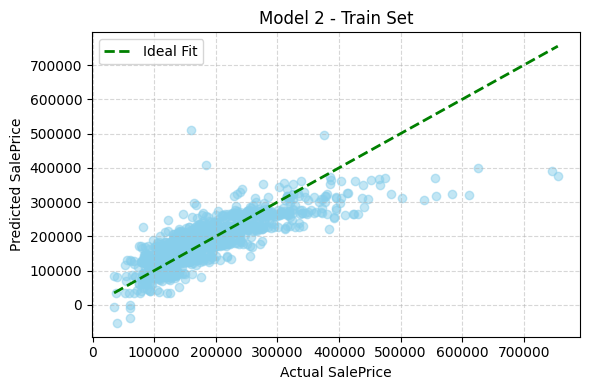


Model 3
Intercept: -128671.61899840608
Coefficient for LotFrontage: 57.82
Coefficient for LotArea: 0.65
Coefficient for OverallQual: 31156.56
Coefficient for OverallCond: 1345.86
Coefficient for 1stFlrSF: 34.73
Coefficient for GrLivArea: 40.15
 Train MSE: 1608729271.41
 Train R² Score: 0.7449
Test Predictions (first 5): [114412.44104773 179758.10025022 144685.54601013 173856.81970052
 228873.96926772]


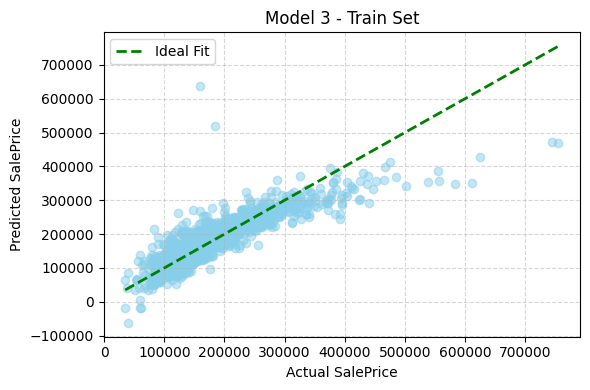

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score

test_num_cols = test_df.select_dtypes(include=['int64', 'float64']).columns
test_cat_cols = test_df.select_dtypes(include=['object']).columns

test_df[test_num_cols] = num_imputer.transform(test_df[test_num_cols])
test_df[test_cat_cols] = cat_imputer.transform(test_df[test_cat_cols])

#  Define models
models = {
    "Model 1": ['LotFrontage', 'LotArea'],
    "Model 2": ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond'],
    "Model 3": ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']
}

for model_name, features in models.items():
    X_train = X[features]
    X_test = test_df[features]

    # Train model
    reg = LinearRegression()
    reg.fit(X_train, y)

    # Predict
    y_pred_train = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)

    # Metrics
    mse_train = mean_squared_error(y, y_pred_train)
    r2_train = r2_score(y, y_pred_train)

    print(f"\n{model_name}")
    print("Intercept:", reg.intercept_)
    for feat, coef in zip(features, reg.coef_):
        print(f"Coefficient for {feat}: {coef:.2f}")
    print(f" Train MSE: {mse_train:.2f}")
    print(f" Train R² Score: {r2_train:.4f}")
    print("Test Predictions (first 5):", y_pred_test[:5])

    #      Plot
    plt.figure(figsize=(6, 4))
    plt.scatter(y, y_pred_train, alpha=0.5, color='skyblue')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linestyle='--', linewidth=2, label='Ideal Fit')
    plt.xlabel("Actual SalePrice")
    plt.ylabel("Predicted SalePrice")
    plt.title(f"{model_name} - Train Set")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


#  multiple regression method

In [ ]:

mixed_models = {
    "Model 4": ['LotArea', 'Street'],
    "Model 5": ['LotArea', 'OverallCond', 'Street', 'Neighborhood'],
    "Model 6": ['LotArea', 'OverallCond', 'Street', '1stFlrSF', 'Neighborhood', 'YearBuilt']
}

def train_mixed_model(model_name, features):
    X_model = X[features].copy()


    X_model_encoded = pd.get_dummies(X_model, drop_first=True)

    # Fit Linear Regression
    model = LinearRegression()
    model.fit(X_model_encoded, y)

    # Output
    print(f"\n {model_name} Coefficients")
    print("Intercept:", model.intercept_)
    for feature_name, coef in zip(X_model_encoded.columns, model.coef_):
        print(f"{feature_name}: {coef:.2f}")

# Train all models
for name, features in mixed_models.items():
    train_mixed_model(name, features)



 Model 4 Coefficients
Intercept: 37557.01249522733
LotArea: 2.25
Street_Pave: 120175.57

 Model 5 Coefficients
Intercept: 91989.56386709031
LotArea: 1.54
OverallCond: 6661.40
Street_Pave: 64356.43
Neighborhood_Blueste: -61309.56
Neighborhood_BrDale: -90839.02
Neighborhood_BrkSide: -83701.07
Neighborhood_ClearCr: -29017.59
Neighborhood_CollgCr: -8056.16
Neighborhood_Crawfor: -7741.92
Neighborhood_Edwards: -79411.49
Neighborhood_Gilbert: -15114.40
Neighborhood_IDOTRR: -100363.50
Neighborhood_MeadowV: -98171.63
Neighborhood_Mitchel: -53679.02
Neighborhood_NAmes: -64645.67
Neighborhood_NPkVill: -55676.47
Neighborhood_NWAmes: -25069.87
Neighborhood_NoRidge: 122346.92
Neighborhood_NridgHt: 109899.17
Neighborhood_OldTown: -83049.05
Neighborhood_SWISU: -65669.99
Neighborhood_Sawyer: -74321.23
Neighborhood_SawyerW: -19351.34
Neighborhood_Somerst: 23454.81
Neighborhood_StoneBr: 104459.26
Neighborhood_Timber: 18768.65
Neighborhood_Veenker: 16678.55

 Model 6 Coefficients
Intercept: -1418757.9387

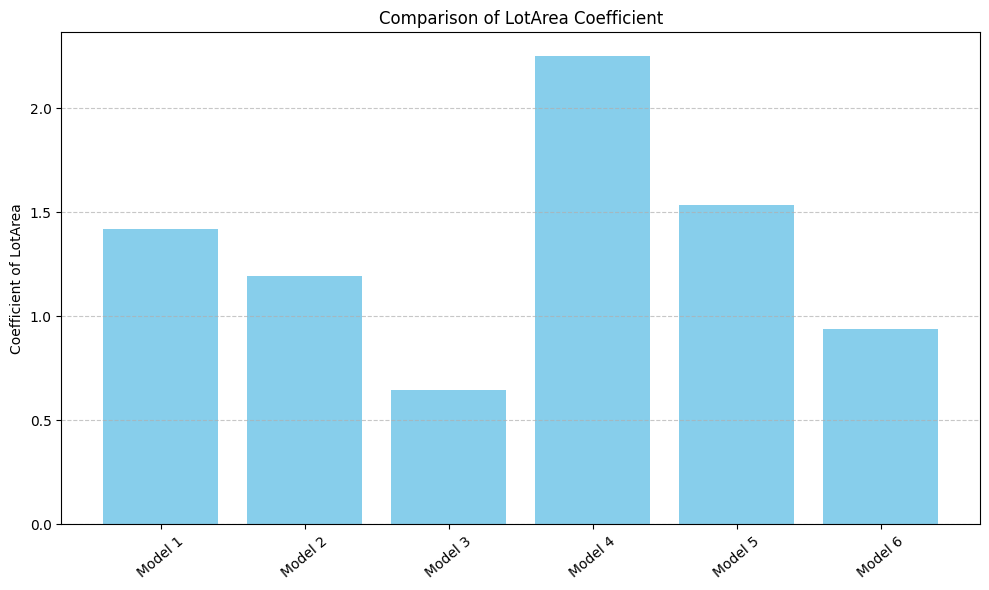

In [ ]:


# Define all models
models = {
    "Model 1": ['LotFrontage', 'LotArea'],
    "Model 2": ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond'],
    "Model 3": ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea'],
    "Model 4": ['LotArea', 'Street'],
    "Model 5": ['LotArea', 'OverallCond', 'Street', 'Neighborhood'],
    "Model 6": ['LotArea', 'OverallCond', 'Street', '1stFlrSF', 'Neighborhood', 'YearBuilt']
}

lotarea_coeffs = {}

for model_name, features in models.items():
    X_model = X[features].copy()

    # Encode if categorical variables exist
    if any(X_model[col].dtype == 'object' for col in X_model.columns):
        X_model = pd.get_dummies(X_model, drop_first=True)

    # Train model
    reg = LinearRegression()
    reg.fit(X_model, y)

    # Get LotArea coefficient
    if 'LotArea' in X_model.columns:
        lotarea_coeffs[model_name] = reg.coef_[X_model.columns.get_loc('LotArea')]
    else:
        lotarea_coeffs[model_name] = 0

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(lotarea_coeffs.keys(), lotarea_coeffs.values(), color='skyblue')
plt.ylabel("Coefficient of LotArea")
plt.title("Comparison of LotArea Coefficient")
plt.xticks(rotation=40)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#  polynomial regression


 Polynomial Regression (Degree 2) Coefficients:
Intercept: 123300.8582190924
Degree 1: 6.0290
Degree 2: -0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


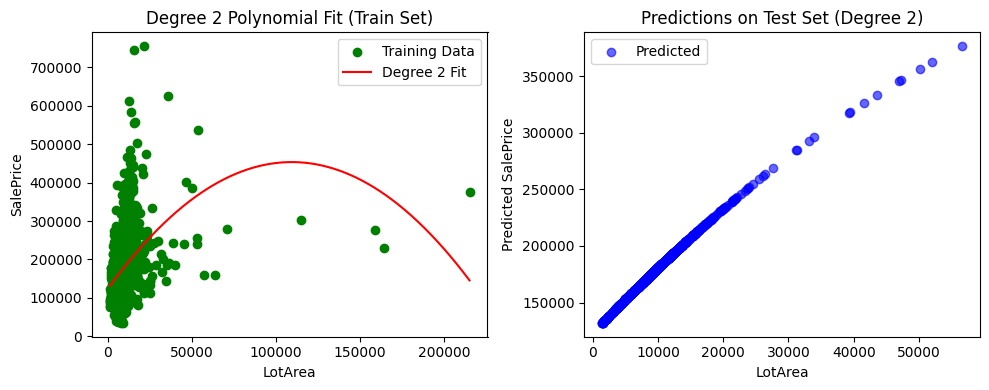


 Polynomial Regression (Degree 3) Coefficients:
Intercept: 99146.66937979833
Degree 1: 9.4623
Degree 2: -0.0001
Degree 3: 0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


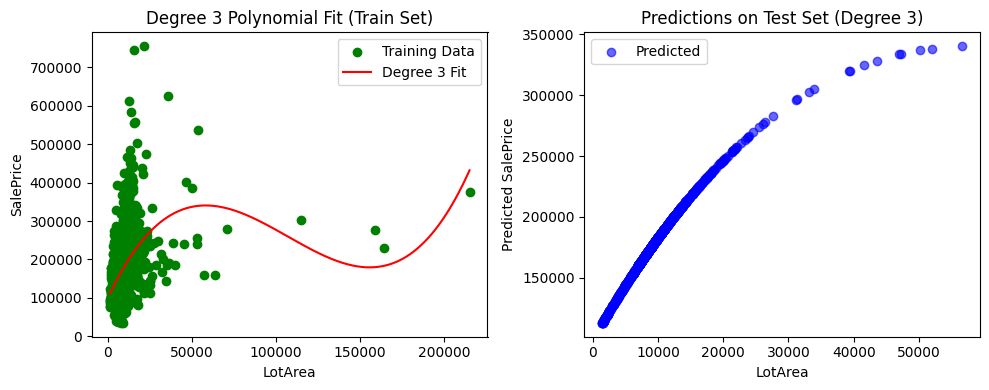

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


X_train = X[['LotArea']]
y_train = y
X_test = test_df[['LotArea']]

# Function for training
def plot_polynomial_regression(degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Print coefficients
    print(f"\n Polynomial Regression (Degree {degree}) Coefficients:")
    print("Intercept:", model.intercept_)
    for i, coef in enumerate(model.coef_):
        print(f"Degree {i+1}: {coef:.4f}")

    # Plot on Training Set
    plt.figure(figsize=(10, 4))

    # Scatter training data
    plt.subplot(1, 2, 1)
    plt.scatter(X_train, y_train, color='green', label='Training Data')

    # Prediction curve
    X_fit = np.linspace(X_train.min(), X_train.max(), 500).reshape(-1, 1)
    X_fit_poly = poly.transform(X_fit)
    y_fit = model.predict(X_fit_poly)
    plt.plot(X_fit, y_fit, color='red', label=f'Degree {degree} Fit')

    plt.title(f"Degree {degree} Polynomial Fit (Train Set)")
    plt.xlabel('LotArea')
    plt.ylabel('SalePrice')
    plt.legend()

    # Plot on Test Set
    plt.subplot(1, 2, 2)
    plt.scatter(X_test, model.predict(poly.transform(X_test)), color='blue', alpha=0.6, label='Predicted')
    plt.title(f"Predictions on Test Set (Degree {degree})")
    plt.xlabel('LotArea')
    plt.ylabel('Predicted SalePrice')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Train and plot for degree 2 and 3
plot_polynomial_regression(degree=2)
plot_polynomial_regression(degree=3)
